# lab-unsupervised-learning-intro

In [1]:
# You want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.
    # My task now is to cluster the songs from my songs_all csv (with audio features)
    # Cluster all the songs (Use K-mean clustering it has the preddict function for new and unseen songs)
        # each song will come out with a cluster number
        # match up the cluster number with the song title
        # Use your model on a single soong (do not refit it, do not recluster anything)
            # Cluster this one song that was input in your song recommender (assign to cluster X)
        # Ia m not going to check if the inout song is actually in my songs_all, I just recommend a similar one according to the audio features

In [2]:
import pandas as pd

Establish the connection to Spotify

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
secrets_file = open("secrets-Copy1.txt","r")

In [5]:
string = secrets_file.read()

In [6]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [7]:
# authentification with secrets

In [8]:
# This creates actually the connection to spotify (spotify wrapper is called sp)
# It uses the key client id to substitue the id
# It will substitue secret
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

Load my audio features as songs_all form CSV file into lab-unsupervised-learning-intro

In [9]:
full_audio_songs = pd.read_csv("songs_all-Copy1.csv")

In [10]:
type(full_audio_songs)

pandas.core.frame.DataFrame

In [11]:
full_audio_songs.isnull().sum()

track.name          4146
name                4146
song_id             4144
danceability           1
energy                 1
key                    1
loudness               1
mode                   1
speechiness            1
acousticness           1
instrumentalness       1
liveness               1
valence                1
tempo                  1
type                   1
id                     1
uri                    1
track_href             1
analysis_url           1
duration_ms            1
time_signature         1
dtype: int64

Load my Hot songs from CSV file into lab-unsupervised-learning-intro

In [12]:
hot_songs = pd.read_csv("hot_songs-Copy1.csv")

In [13]:
# Look at the data

In [14]:
full_audio_songs.head()


,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8.0,-4.968,1.0,0.0479,0.1390,...,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880.0,4.0
1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2.0,-5.495,1.0,0.0420,0.0966,...,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227.0,4.0
2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,11.0,-5.294,0.0,0.0269,0.5420,...,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200.0,3.0
3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627,0.608,0.629,10.0,-5.024,1.0,0.0264,0.4230,...,0.0978,0.325,99.953,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467.0,4.0
4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8.0,-5.119,1.0,0.0294,0.1310,...,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293.0,4.0


In [15]:
full_audio_songs.shape

(23249, 21)

In [16]:
hot_songs.head()

,title,artist
0,Lil Boo Thang,Paul Russell
1,Wrap Me Up,Jimmy Fallon & Meghan Trainor
2,Lovin On Me,Jack Harlow
3,Find Your People,Drew Holcomb & The Neighbors
4,DJ Play A Christmas Song,Cher


In [17]:
hot_songs.shape

(200, 2)

# KMeans

In [18]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [19]:
type(full_audio_songs)

pandas.core.frame.DataFrame

In [20]:
def drop_nulls_in_all_columns(df):
    df_copy = df.copy()
    for column in df_copy.columns:
        df_copy[column].dropna(inplace=True)
    return df_copy

In [21]:
full_audio_songs = drop_nulls_in_all_columns(full_audio_songs)

In [22]:
type(full_audio_songs)

pandas.core.frame.DataFrame

In [23]:
# Differentiate in categorical and numerical columns 
    # K-means can only handle numerical

In [24]:
# This columns are numerical
    # danceability	energy	key	loudness	mode	speechiness	acousticness	...	liveness	valence	tempo

In [25]:
# Drop all the categorical columns
categorical_columns = ['track.name', 'name', 'song_id', 'type', 'id', 'uri', 'track_href', 'analysis_url']

In [26]:
# Splitting numerical and categorical for plotting
categorical = full_audio_songs.select_dtypes(include=object)
numerical = full_audio_songs.select_dtypes(include=np.number)

In [27]:
categorical.columns

Index(['track.name', 'name', 'song_id', 'type', 'id', 'uri', 'track_href',
       'analysis_url'],
      dtype='object')

In [28]:
# Checks out with categorical classification

In [29]:
def drop_categorical_columns(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=object).columns
    
    # Drop categorical columns
    df = df.drop(categorical_columns, axis=1)
    
    return df

In [30]:
type(full_audio_songs)

pandas.core.frame.DataFrame

In [31]:
full_audio_songs = drop_categorical_columns(full_audio_songs)
full_audio_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.638,0.826,8.0,-4.968,1.0,0.0479,0.13900,0.000000,0.0803,0.649,124.072,227880.0,4.0
1,0.397,0.817,2.0,-5.495,1.0,0.0420,0.09660,0.000008,0.3160,0.416,158.004,266227.0,4.0
2,0.384,0.527,11.0,-5.294,0.0,0.0269,0.54200,0.000000,0.1560,0.222,100.730,221200.0,3.0
3,0.608,0.629,10.0,-5.024,1.0,0.0264,0.42300,0.000000,0.0978,0.325,99.953,241467.0,4.0
4,0.729,0.756,8.0,-5.119,1.0,0.0294,0.13100,0.000000,0.0527,0.522,104.945,228293.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23244,0.439,0.610,9.0,-7.236,1.0,0.1160,0.59300,0.000011,0.3410,0.172,181.088,215508.0,4.0
23245,0.897,0.371,1.0,-5.019,1.0,0.3680,0.09040,0.000000,0.3250,0.441,81.008,156005.0,4.0
23246,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,0.000039,0.1010,0.563,105.012,178405.0,4.0
23247,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,0.000039,0.1010,0.563,105.012,178405.0,4.0


In [60]:
full_audio_songs.isna().sum()

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
dtype: int64

In [61]:
full_audio_songs = full_audio_songs.dropna()

In [32]:
# The scale of "duration and tempo" are much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
full_audio_songs_scaled = StandardScaler().fit_transform(full_audio_songs)

# Now, all features will have the same weight.
full_audio_songs_scaled = pd.DataFrame(full_audio_songs_scaled,columns=full_audio_songs.columns)

In [33]:
type(full_audio_songs_scaled)

pandas.core.frame.DataFrame

In [34]:
full_audio_songs_scaled.shape

(23249, 13)

In [35]:
full_audio_songs_scaled.isna().sum()

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
dtype: int64

In [36]:
full_audio_songs_scaled = full_audio_songs_scaled.dropna()

In [37]:
full_audio_songs_scaled.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

# Choosing k

In [38]:
from sklearn.cluster import KMeans

In [39]:
# Choosing the amount of clusters

In [40]:
# I cant use  kmeans.fit() multiple times in the same notebook, therefore I have to externalize the method to search for k 

In [41]:
# https://pythonprogramming.net/python-pickle-module-save-objects-serialization/

In [42]:
import pickle

In [43]:
# Lesson 6.05

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

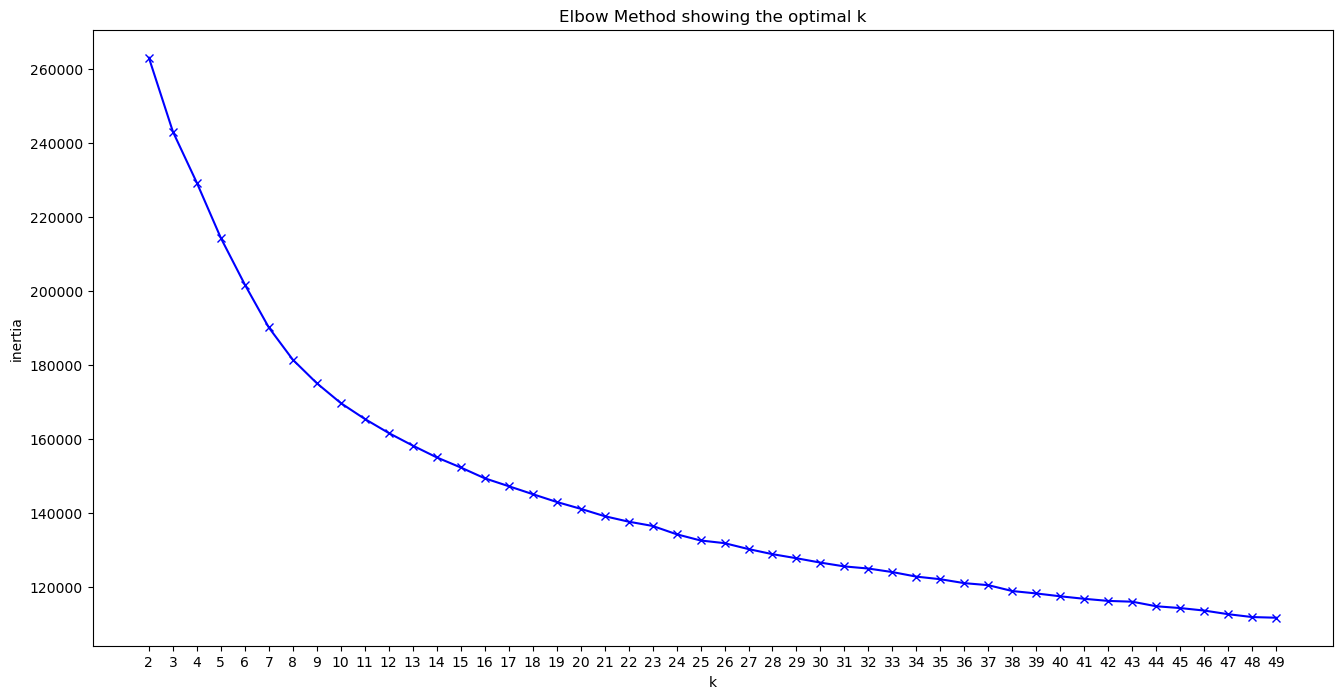

In [44]:
import numpy as np
K = range(2, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(full_audio_songs_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# optimal number of clusters seems to be 8 for my data

In [ ]:
# With a higher number of clusters the inertia value will be lower

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

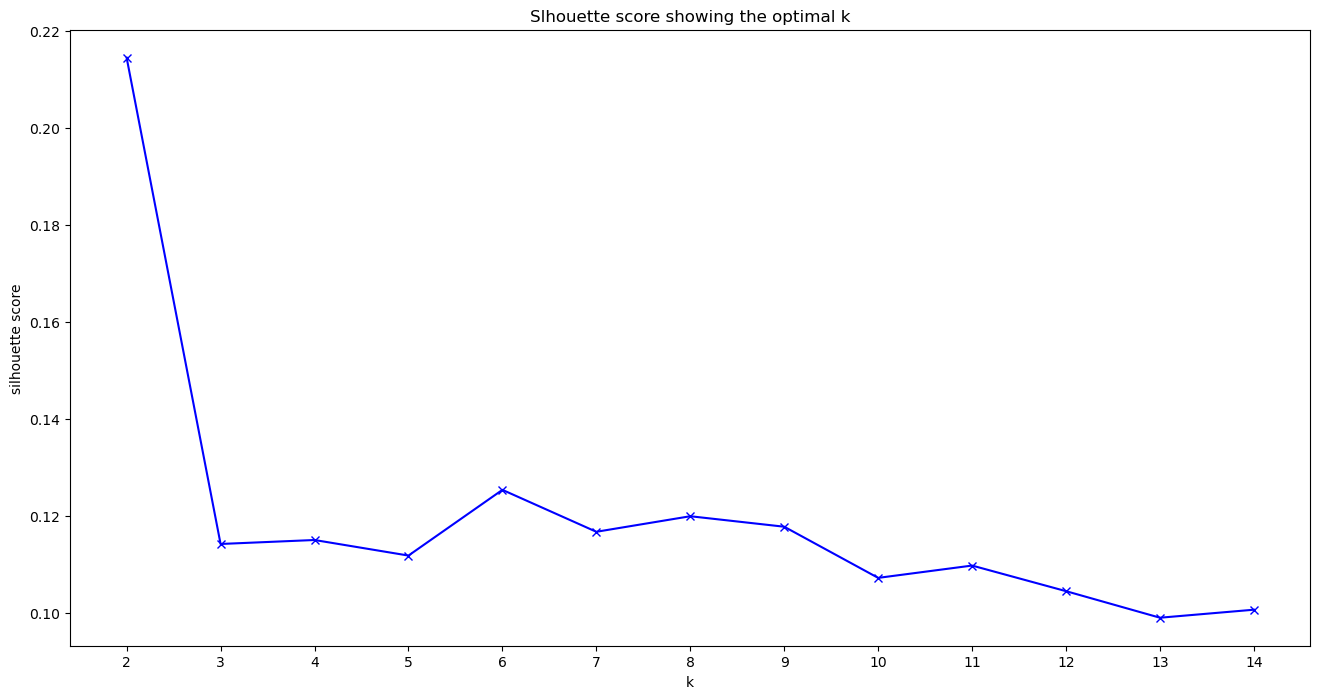

In [45]:
from sklearn.metrics import silhouette_score
K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(full_audio_songs_scaled)
    silhouette.append(silhouette_score(full_audio_songs_scaled, kmeans.predict(full_audio_songs_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [47]:
# Make decision on cluster number based on elbow method and silhouette score
# In my shillouette score I can see multiple peaks
# The first and highest is at 6, then I have another peak at 8, which is slightly lower, after this I have a strong decrease
    # Since I decided for 8 in my elbowscore, and 8 is also a reasonable peak here, i will go with 8 clusters (6 would also make sense)

In [54]:
# I fit it here on 8 clusters, based on elbow- and silhouette score. 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(full_audio_songs_scaled)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1234)

In [55]:
# Predicting / assigning the clusters:
# Assign the values to clusters (for each point assign a cluster number with predict)
# Probable outcome are clusters with similiar size?
clusters = kmeans.predict(full_audio_songs_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index() 

0    4208
1    6037
2     719
3     894
4    5465
5    2874
6    1778
7    1273
Name: count, dtype: int64

In [ ]:
# The sizes of the clusters differ signficantly (cluster three 719 as smallest, vs clsuter 1 with 6037 biggest cluster)

In [56]:
# Only relevant for different k-mean models with the same data (as comparison value)
kmeans.inertia_ 

181413.56878411883

In [63]:
full_audio_songs_clustered = full_audio_songs.assign(clusters = clusters)
full_audio_songs_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.638,0.826,8.0,-4.968,1.0,0.0479,0.13900,0.000000,0.0803,0.649,124.072,227880.0,4.0,1
1,0.397,0.817,2.0,-5.495,1.0,0.0420,0.09660,0.000008,0.3160,0.416,158.004,266227.0,4.0,0
2,0.384,0.527,11.0,-5.294,0.0,0.0269,0.54200,0.000000,0.1560,0.222,100.730,221200.0,3.0,3
3,0.608,0.629,10.0,-5.024,1.0,0.0264,0.42300,0.000000,0.0978,0.325,99.953,241467.0,4.0,0
4,0.729,0.756,8.0,-5.119,1.0,0.0294,0.13100,0.000000,0.0527,0.522,104.945,228293.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23244,0.439,0.610,9.0,-7.236,1.0,0.1160,0.59300,0.000011,0.3410,0.172,181.088,215508.0,4.0,0
23245,0.897,0.371,1.0,-5.019,1.0,0.3680,0.09040,0.000000,0.3250,0.441,81.008,156005.0,4.0,6
23246,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,0.000039,0.1010,0.563,105.012,178405.0,4.0,4
23247,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,0.000039,0.1010,0.563,105.012,178405.0,4.0,4
